# Solving differential equations:
## Euler method
### First order differential equation

Since $$\frac{\mathrm{d}y}{\mathrm{d}t} = \frac{y(t+h)-y(t)}{h}$$ We know that $$ y(t+h) = \frac{\mathrm{d}y}{\mathrm{d}t}h + y(t)$$

Therefore, we can repetitively iterate the propagation:

From the value $y_n$ at step $n$, corresponding to the time $t$, we can calculate the value $y_{n+1}$ at step $(n+1)$ corresponding to the time $(t+h)$:

$$y_{n+1} = y_n + \frac{\mathrm{d}y}{\mathrm{d}t}h$$
which is
$$ y_{n+1} = y_n + f(t,y_n) h $$

### Example 1) Radioactive decay
$ \dot{n} = -n$ or

$ \frac{\mathrm{d}n}{\mathrm{d}t} = f(t,y) = -n$

Analytical solution: $ n(t)=y_0 \exp(-t)$

In [2]:
import numpy as np
import matplotlib.pyplot as plt

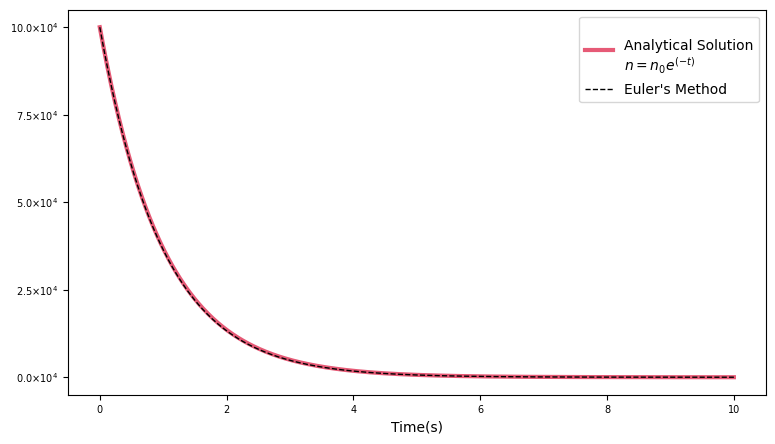

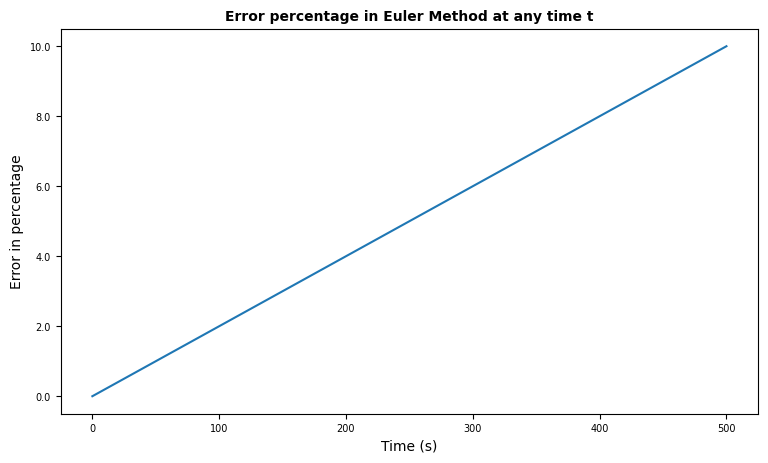

In [3]:
fontdict={"fontsize":10, "fontweight":"bold"}
def plot_setup():
    plt.figure(figsize=(9,5))
    plt.yticks(fontsize=7)
    plt.xticks(fontsize=7)
plot_setup()
n0=1e5
start=0
end=10
numpoints=501
h=(end-start)/(numpoints-1)
tlist=np.linspace(start,end,numpoints)
nt=[n0]
def decay_calc(i):
    nt.append(nt[i-1]-nt[i-1]*h)

for i in range(1,len(tlist)):
    decay_calc(i)

nt=np.array(nt)
n_abs=n0*np.exp(-1*tlist)
plt.plot(tlist,n_abs,label="\nAnalytical Solution\n$n=n_0 e^{(-t)}$",alpha=0.7,lw=3,color="crimson")
plt.plot(tlist,nt,label="Euler's Method",linestyle="--",color="black",lw=1)
yticks=np.linspace(0,n0,5)
yticks_str=[f"{y/1e4}"+"$\\times10^4$" for y in yticks]
plt.xlabel("Time(s)")
plt.yticks(yticks, yticks_str)
plt.legend()
plt.show()
plot_setup()
error_array=np.abs(nt-n_abs)/np.maximum(n_abs,1e-12)*100
plt.plot(tlist,)
plt.title("Error percentage in Euler Method at any time t",fontdict=fontdict)
yticks=np.linspace(0,10,6)
yticks_str=np.array([ f"{int(y)}"+"%" for y in yticks])
yticks_str=yticks.tolist()
plt.yticks(yticks,yticks_str)
plt.ylabel("Error in percentage")
plt.xlabel("Time (s)")

plt.show()


Now im trying to get my hands around some random problems
The equation I selected is a Riccati equation:
$$\boxed{\frac{dy}{dt} = y^2 + \sin(t), \qquad y(0) = 0.1}$$
Which has approximation solution,
$$
y_{\text{approx}}(t) =\;
y_0
+ 1 - \cos t 
+ y_0^2\,t
+ 2y_0(t - \sin t) 
+ \tfrac{3}{2}t
- 2\sin t
+ \tfrac{1}{4}\sin(2t)
$$

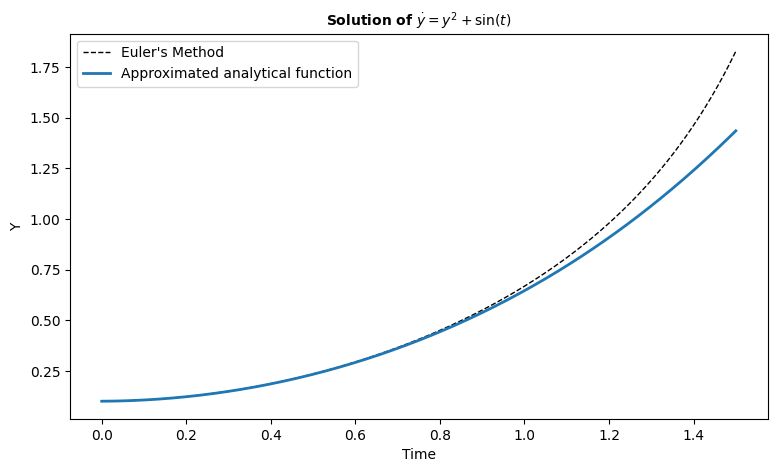

In [4]:
def plot_setup():
    plt.figure(figsize=(9,5))
plot_setup()
y0=0.1
start=0
end=1.5
numpoints=501
h=(end-start)/(numpoints-1)
tlist=np.linspace(start,end,numpoints)
yt=[y0]
def sol_calc(i):
    yprev=yt[i-1]
    yt.append(yprev+((((yprev**2)+(np.sin(tlist[i])))*h)))
for i in range(1,len(tlist)):
    sol_calc(i)
yt=np.array(yt)
mask = np.abs(yt)<10
plt.plot(tlist[mask],yt[mask],label="Euler's Method",linestyle="--",color="black",lw=1)
def y_approx(t):
    return (y0+ 1 - np.cos(t)+ y0**2 * t+ 2*y0*(t - np.sin(t))+ 1.5*t- 2*np.sin(t)+ 0.25*np.sin(2*t))

plt.plot(tlist[mask], y_approx(tlist)[mask], lw=2, label="Approximated analytical function")

plt.title("Solution of $\\dot y= y^2 +\\sin(t)$",fontdict=fontdict)
plt.xlabel("Time")
plt.ylabel("Y")
plt.legend()
plt.show()



### Higher Order differential equation Using Euler method:
Now that we are able to find the solution for the first order equation, we can find the second order differential equation, if the second order equation is like the gravity,
$$\dot y = -a$$
We can find the velocity at each time and later the displacement as well with the euler method by considering each are seperate first order differential  equation of one and another, and substituting in the taylor expansion to get into accurate results.
But the cases like, the simple harmonic oscillator
$$\ddot x = - m \omega ^2 x$$
We have to find the displacement first for the solution to jump to next position at time t.

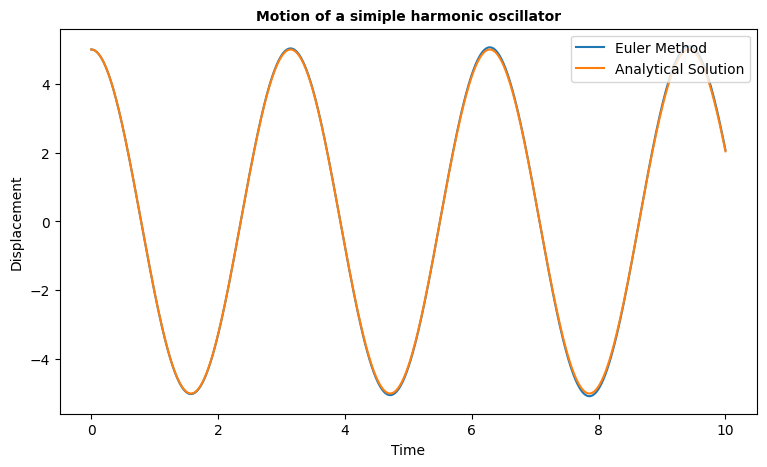

In [10]:
plot_setup()
x0=5
xdash0=0
omega=2
m=1
tlist=np.linspace(0,10,5000)
h=tlist[2]-tlist[1]

def diff_eqn(xt,xdasht):
    return -1*(omega**2)*xt

def second_order_solution(x0=x0,xdash0=xdash0,tlist=tlist):
    xdash=[xdash0]
    x=[x0]
    for n in range(1,len(tlist)):
        newxdash= xdash[n-1]+(((diff_eqn(xt=x[n-1],xdasht=xdash[n-1]))+0)*h)
        xdash.append(newxdash)
        newx=x[n-1]+(xdash[n-1]*h)+(1/2*diff_eqn(xt=x[n-1],xdasht=xdash[n-1])*h**2)
        x.append(newx)
    return x
x=second_order_solution()
plt.plot(tlist,x, label="Euler Method")
plt.plot(tlist,x0*np.cos(omega*tlist),label="Analytical Solution")
plt.title("Motion of a simiple harmonic oscillator",fontdict=fontdict)
plt.legend(loc="upper right")
plt.ylabel("Displacement")
plt.xlabel("Time")
plt.show()